# Visualizing labelled images

In [1]:
import pylab as plt
import cv2
import numpy as np
import skimage.io as skio
import matplotlib
%matplotlib notebook
import pandas as pd

import json
import os

In [2]:
# Exported labels JSON file:
with open('all_labels_test.json', 'r') as f:
    all_labels = json.load(f)
len(all_labels)

# Image directory (This ipynb is currently executed in a container):
images_root_dir = '/labelling_tool/'

### Util functions:

In [3]:
def find_all_classes(all_labels):
    classes = set()
    for label in all_labels:
        if 'example' in label['img_path']:
            for bb in label['bbs']:
                classes.add(bb['label'])
    return list(classes)

In [4]:
def hex_to_rgb(hex):
    h = hex.lstrip('#')
    rgb = tuple(int(h[i:i+2], 16) for i in (0, 2 ,4))
    
    return rgb

def get_rgb_color(class_name, df):
    return df[df['class'] == class_name]['rgb_color'][0]

##### Now create Dataframe associating arbitrary RGB color for each class:

In [5]:
# matplotlib.colors.cnames is a dict matching color names to their hexadecimal values
df = pd.DataFrame.from_dict(matplotlib.colors.cnames, orient='index')

df.columns = ['hex']
df['rgb_color'] = df.applymap(hex_to_rgb)

classes = find_all_classes(all_labels)
class_colours_df = df.sample(len(classes))
class_colours_df['class'] = classes
class_colours_df

,hex,rgb_color,class
burlywood,#DEB887,"(222, 184, 135)",math
gold,#FFD700,"(255, 215, 0)",Image
bisque,#FFE4C4,"(255, 228, 196)",Title
ghostwhite,#F8F8FF,"(248, 248, 255)",List-item
teal,#008080,"(0, 128, 128)",Text
magenta,#FF00FF,"(255, 0, 255)",List-title
papayawhip,#FFEFD5,"(255, 239, 213)",Text-extraction


In [6]:
def make_int_tuple(col):
    return (int(col[0]), int(col[1]))

### For each example image, draw the bounding boxes over the image:

/labelling_tool/static/images_to_be_labelled/example_img0.png


<IPython.core.display.Javascript object>


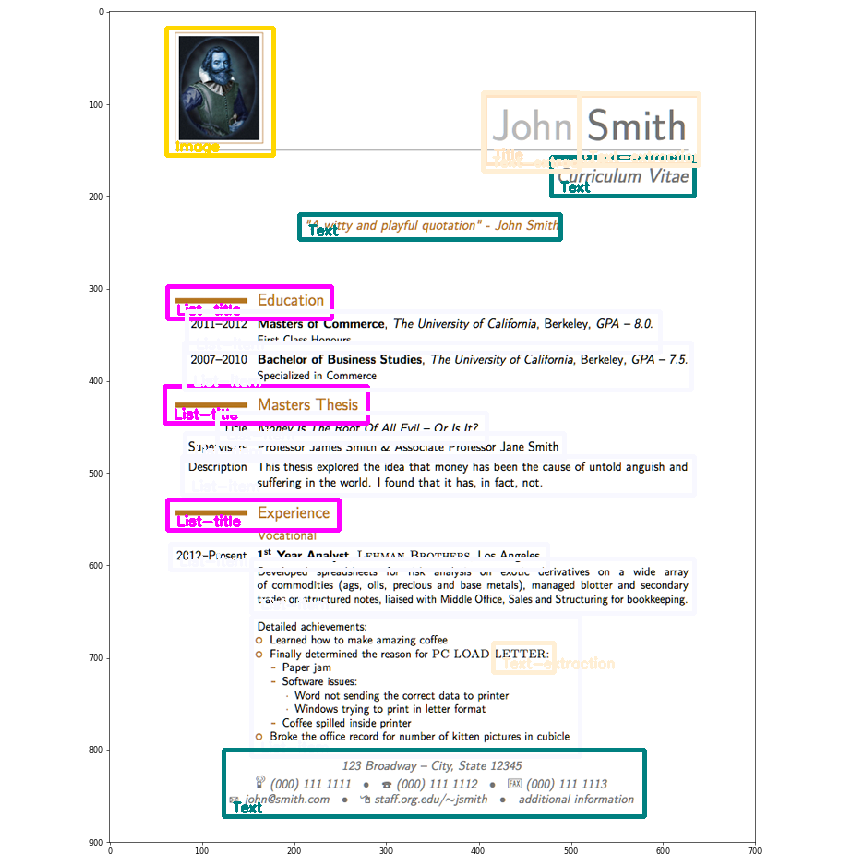

/labelling_tool/static/images_to_be_labelled/example_img1.jpeg


<IPython.core.display.Javascript object>


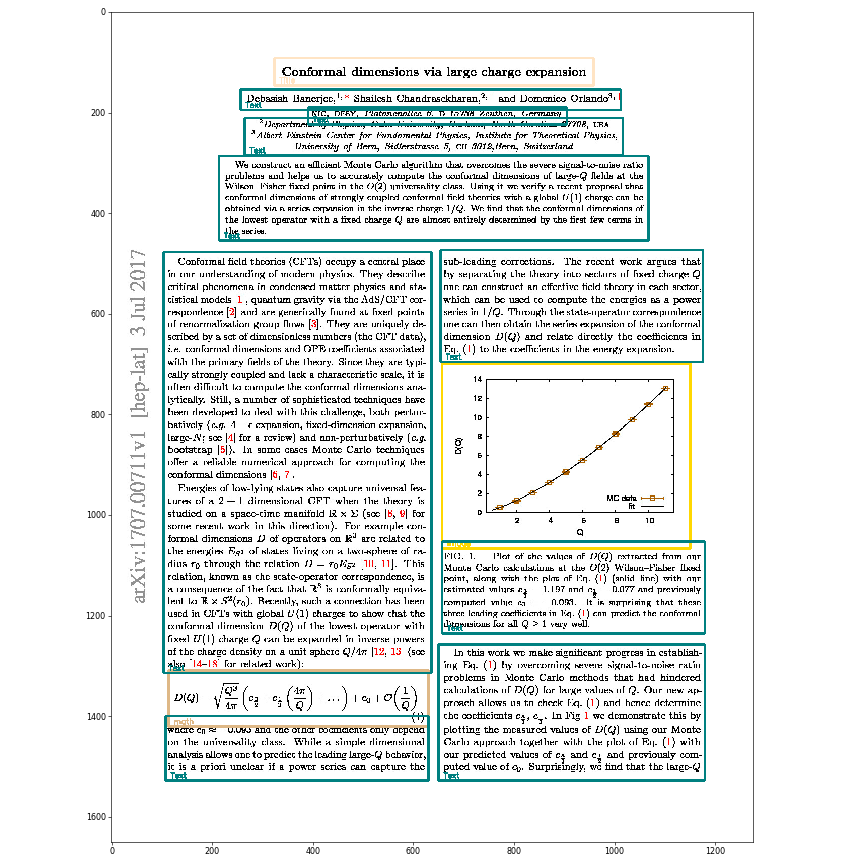

/labelling_tool/static/images_to_be_labelled/example_img2.jpeg


<IPython.core.display.Javascript object>


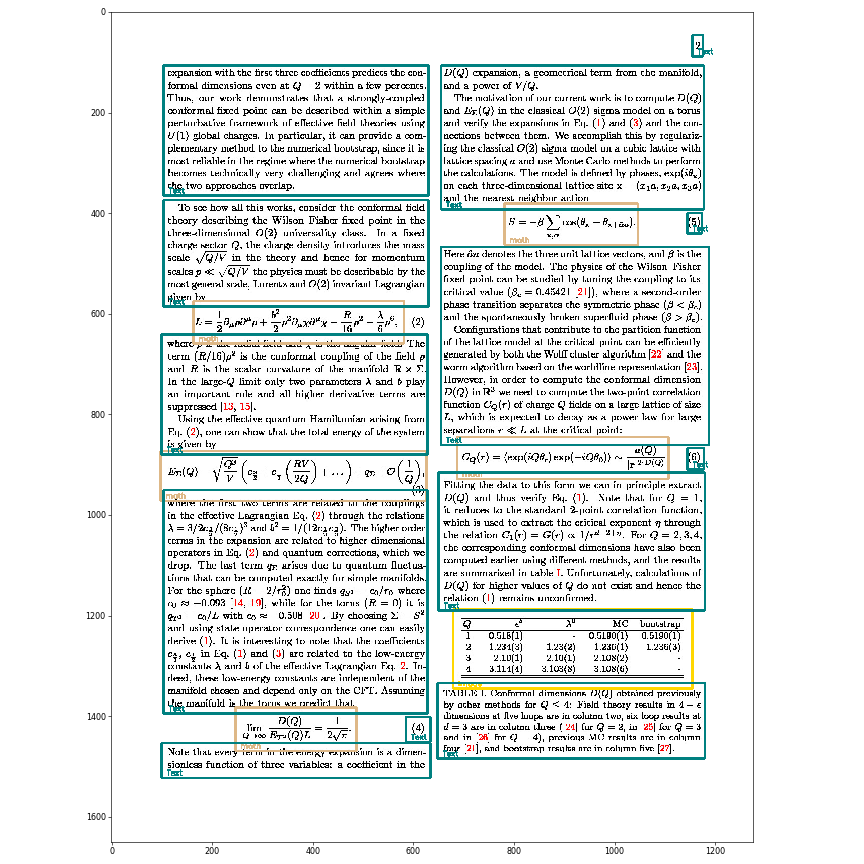

In [9]:
for label in all_labels:
    
    if 'example' in label['img_path']:
        img_path = os.path.join(images_root_dir, label['img_path'])
        print(img_path)
        img = cv2.imread(img_path)

        for bb in label['bbs']:

            label_type = bb['label_type']
            color = get_rgb_color(bb['label'], class_colours_df)
            point_0 = make_int_tuple(bb['point_0'])
            point_1 = make_int_tuple(bb['point_1'])

            cv2.rectangle(img, point_0, point_1, color, thickness=3)
            cv2.putText(img, 
                        bb['label'], 
                        (point_0[0] + 10, point_1[1] - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        color, 
                        thickness=2)

        plt.figure(figsize=(15, 15))
        skio.imshow(img)